In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

In [106]:
df = pd.read_csv('diamonds.csv', index_col = [0])
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [107]:
df = df.reset_index(drop = True) # back to zero indexing

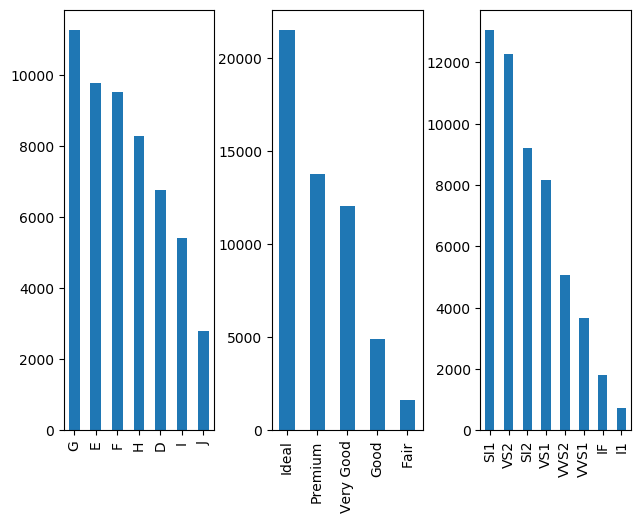

In [108]:
fig, ax = plt.subplots(1, 3)
fig.tight_layout()
plt.subplot(1,3,1)
df['color'].value_counts().plot(kind='bar');
plt.subplot(1,3,2)
df['cut'].value_counts().plot(kind='bar');
plt.subplot(1,3,3)
df['clarity'].value_counts().plot(kind='bar');

In [109]:
totals = df.groupby(['clarity', 'color']).count()

In [110]:
#print(totals)
totals.head()
#print(totals['carat'].sum())
#print(totals.get_group('I1'))
print(totals.keys())
carat_df = totals['carat']
#carat_df.head()


Index(['carat', 'cut', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


In [111]:
def var_counts_bargraph(df, var_to_count, ordered_var_list, plot_title, x_axis_label):

    carat_table = pd.crosstab(index=df[var_to_count], columns="count")
    print(carat_table)
    qual_counts = []
    for each in qual_order_x:
        count_val = carat_table['count'][each]
        qual_counts.append(count_val)
    data_tuples = list(zip(qual_order_x, qual_counts))
    new_df = pd.DataFrame(data_tuples, columns = [var_to_count, 'count'])
    ax = sns.countplot(x = var_to_count, data = df, color = '#1A8B71', order = ordered_var_list)
    ax.set_title(plot_title, fontsize = 18)
    ax.set(xlabel = x_axis_label, ylabel = 'Count')
    plt.show()
    sns.reset_defaults()


col_0    count
clarity       
I1         741
IF        1790
SI1      13065
SI2       9194
VS1       8171
VS2      12258
VVS1      3655
VVS2      5066


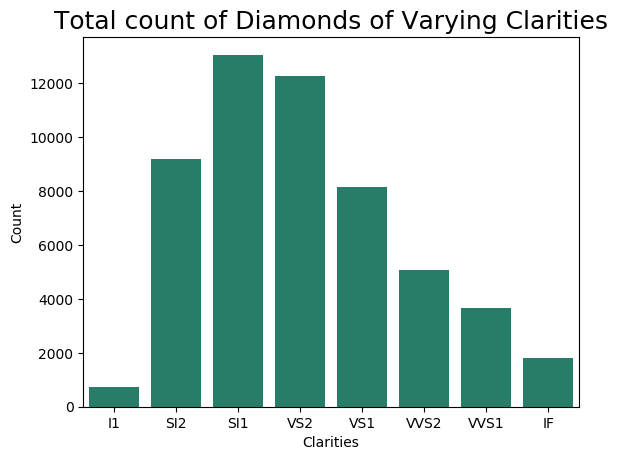

In [112]:
qual_order_x = ['I1', 'SI2', 'SI1', 'VS2', 'VS1','VVS2', 'VVS1', 'IF']
var_counts_bargraph(df, 'clarity', qual_order_x, "Total count of Diamonds of Varying Clarities", "Clarities")

In [113]:
def stacked_bargraph(df, stacked_var, x_var, plot_title, x_axis_label, y_axis_label):
    
    num_categories = len(df[stacked_var].unique())
    pal = sns.cubehelix_palette(num_categories, start = 0, rot = -.7)
    sns.set_palette(pal)

    title = 'Diamond Color Constituents for Each Class of Clarity'
    x_label = "Clarity"
    y_label = "Total Count of Diamonds by Clarity"


    carat_table = pd.crosstab(index = df["clarity"], columns = df["color"])
    ax = carat_table.plot(kind="bar", figsize = (10,6), color = pal, stacked=True)
    ax.set_title(plot_title, fontsize = 18)
    ax.set(xlabel = x_axis_label, ylabel = y_axis_label)
    plt.show()
    sns.reset_defaults()

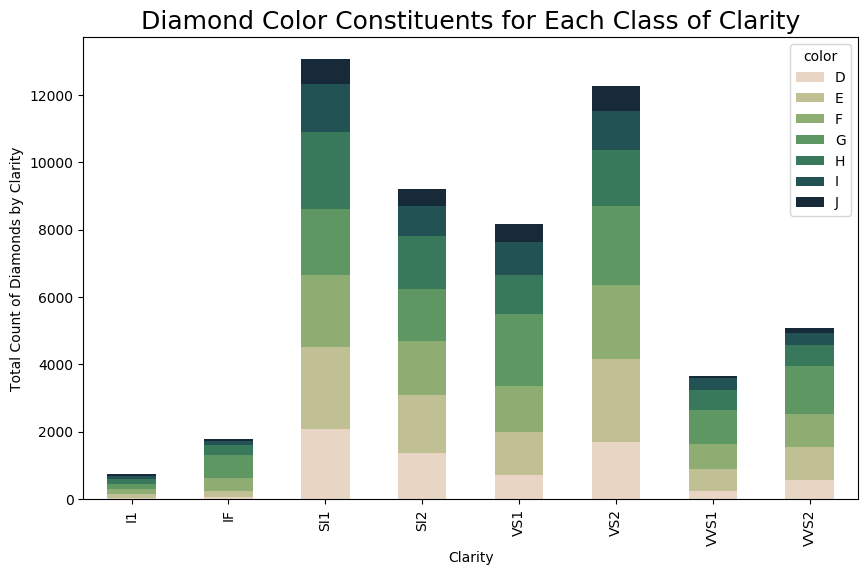

In [114]:
stacked_bargraph(df, 'color', 'clarity', 'Diamond Color Constituents for Each Class of Clarity',
                     "Clarity", "Total Count of Diamonds by Clarity")


In [115]:
def price_bar_chart(variable, variable_list, df, plot_title, x_axis_label,
                    y_axis_label):
    
    cut_averages = df.groupby([variable]).mean()
    cut_averages['price per carat'] = cut_averages['price']/cut_averages['carat']
    cut_averages['index'] = cut_averages.index
    cut_averages.set_index('index', inplace = True)

    price_by_cut = []
    for each in variable_list:
        avg_price = cut_averages.loc[each, 'price per carat']
        price_by_cut.append(avg_price)


    avg_price = np.mean(price_by_cut)
    price_by_cut.insert(0, avg_price)
    variable_list.insert(0, 'Dataset Average')
    

    clrs = ['#1A8B71' if x != 'Dataset Average' else '#6FB28C' for x in variable_list]
    plt.figure(figsize = (10,6))
    sns.set(style = "whitegrid")
    ax = sns.barplot(x = variable_list, y = price_by_cut, palette = clrs)
    ax.set_title(plot_title, fontsize = 18)
    ax.set(xlabel = x_axis_label, ylabel = x_axis_label)
    plt.show()
    sns.reset_defaults()
    
    

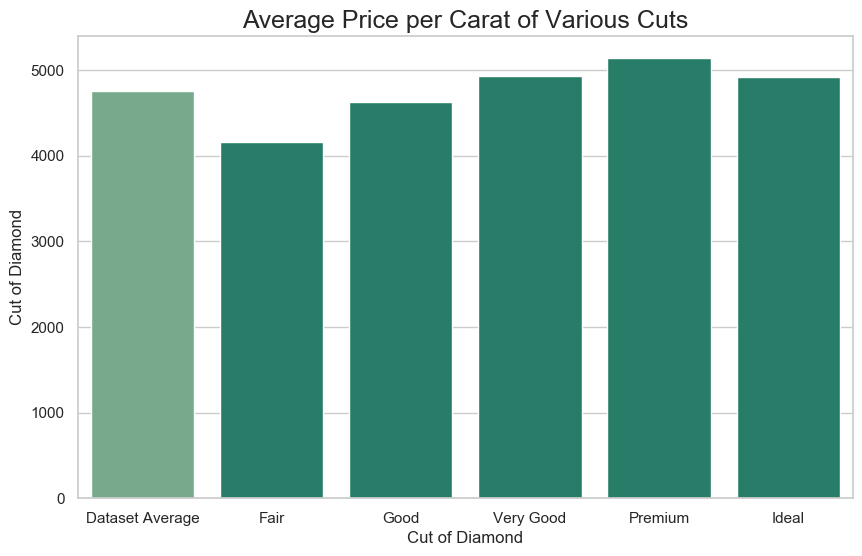

In [116]:
cut_list = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_list = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
price_bar_chart('cut', cut_list, df, 'Average Price per Carat of Various Cuts', 
                'Cut of Diamond', 'Price per Carat')


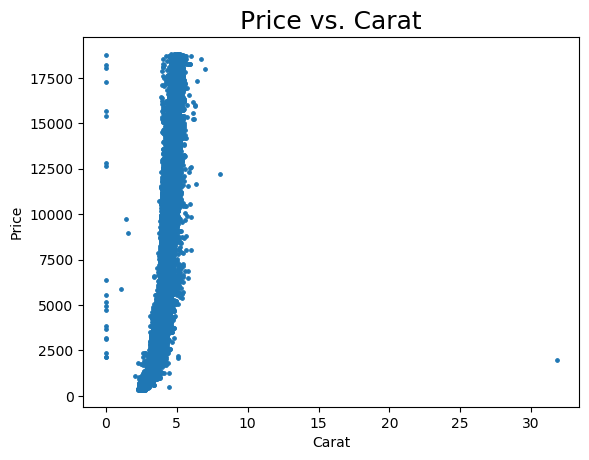

In [125]:
#sns.reset_defaults()

title = 'Price vs. Carat' 
x_label = 'Carat'
y_label = 'Price'


ax = sns.scatterplot(x = df['z'], y = df['price'], data = df, s = 7, edgecolor = None)
ax.set_title(title, fontsize = 18)
ax.set(xlabel = x_label, ylabel = y_label)
plt.show()

In [118]:
df = pd.read_csv('diamonds.csv', index_col = [0])
df = df.reset_index(drop = True)

new_arr = np.array(df)

X = np.array(new_arr[:, -4], dtype=float)
y = np.array(new_arr[:, 0], dtype=float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)


In [122]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 


def poly_regression(degree_list, color_list, X_train, y_train, X_test, y_test):
    for degree, color in zip(degree_list, colorlist):
        poly = PolynomialFeatures(degree = degree) 
        X = poly.fit_transform(X_train.reshape(-1, 1)) 

        poly.fit(X, y_train) 
        lin = LinearRegression() 
        lin.fit(X, y_train)
        j = lin.predict(poly.fit_transform(X_train.reshape(-1, 1)))
        s = lin.predict(poly.fit_transform(X_test.reshape(-1, 1))) 
        SSE1 = ((np.subtract(j, y_train))**2).sum()
        SSE2 = ((np.subtract(s, y_test))**2).sum()
        print(SSE1, SSE2)
        lin_range = np.linspace(0, 18000, num = 30000)  
  
        plt.plot(lin_range, lin.predict(poly.fit_transform(lin_range.reshape(-1, 1))), color = color) 
    plt.scatter(X_test, y_test)
    plt.title('Polynomial Regression') 
    plt.xlabel('Carat') 
    plt.ylabel('Price') 
  
    plt.show()

1445.4562599331007 380.5863430474071
1087.3525792440655 287.9512670124117
994.194288777905 264.03631632098563
974.6550012465872 260.51645271160316
1060.182135226177 285.50915479205275
1500.0698612577924 397.9388810959499
2179.466800726673 566.326546286941


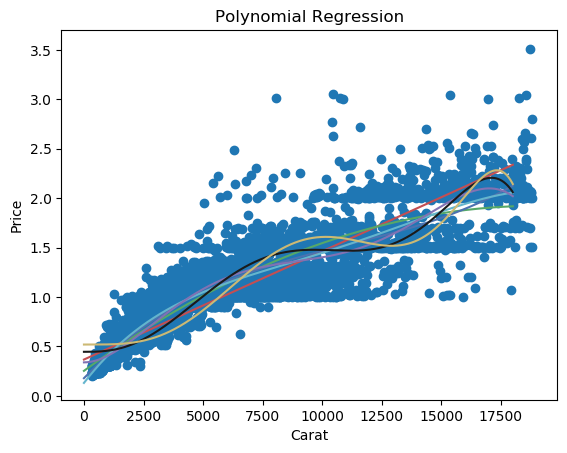

In [128]:
degree_list = [1, 2, 3, 4, 5, 6, 7]
colorlist = list("rgbcmky")
poly_regression(degree_list, color_list, X_train, y_train, X_test, y_test)